In [1]:
import pandas as pd

data = pd.read_excel("./01_data_for_homework_assignment.xlsx", index_col=0)
data = data.transpose()
data = data.drop(data.index[-1])
data.head()

"Hour of the day, n",Cons,kWh price for buying,PV,kWh price for selling
0,0.43,2.28,0.0,1.03
1,0.43,2.19,0.0,0.95
2,0.43,2.13,0.0,0.88
3,0.43,2.13,0.0,0.88
4,0.43,2.16,0.0,0.92


In [2]:
soc = 2.93
soc_max = 8
soc_min = 0

results = []

for index, row in data.iterrows():
    soc += row["PV"] - row["Cons"]
    overCon= max(soc - soc_max, 0) 
    overProd = max(soc_min - soc, 0) 
    soc = max(min(soc, soc_max), soc_min) # Clamp range

    results.append([soc, overProd, overCon])
    # print(f"{soc:.2f}           overCon: {overCon:.2f} overProd: {overProd:.2f}")
    
soc_df = pd.DataFrame(results, columns=["SoC", "overProd", "overCon"])    

print(soc_df)
soc_df.to_csv("./SoC_results.csv")

     SoC  overProd  overCon
0   2.50      0.00     0.00
1   2.07      0.00     0.00
2   1.64      0.00     0.00
3   1.21      0.00     0.00
4   0.78      0.00     0.00
5   0.35      0.00     0.00
6   0.00      0.14     0.00
7   0.00      0.73     0.00
8   0.00      0.55     0.00
9   1.03      0.00     0.00
10  3.42      0.00     0.00
11  6.85      0.00     0.00
12  8.00      0.00     3.00
13  8.00      0.00     4.49
14  8.00      0.00     4.41
15  8.00      0.00     3.77
16  8.00      0.00     2.77
17  8.00      0.00     1.38
18  7.87      0.00     0.00
19  6.65      0.00     0.00
20  5.52      0.00     0.00
21  4.47      0.00     0.00
22  3.58      0.00     0.00
23  2.93      0.00     0.00


In [3]:
price = ((data["kWh price for buying"] + soc_df["overCon"])).sum()
print(f"Total price for power with battery: {price} DKK")

Total price for power with battery: 76.34 DKK


In [4]:
earning = ((data["kWh price for selling"] + soc_df["overProd"])).sum()
print(f"Total profit for power with battery: {earning} DKK")

Total profit for power with battery: 25.48 DKK


In [5]:
soc_df["profit"] = data["kWh price for buying"] + soc_df["overCon"]
soc_df["cost"] = data["kWh price for selling"] + soc_df["overProd"]
soc_df.to_csv("./SoC_results.csv")

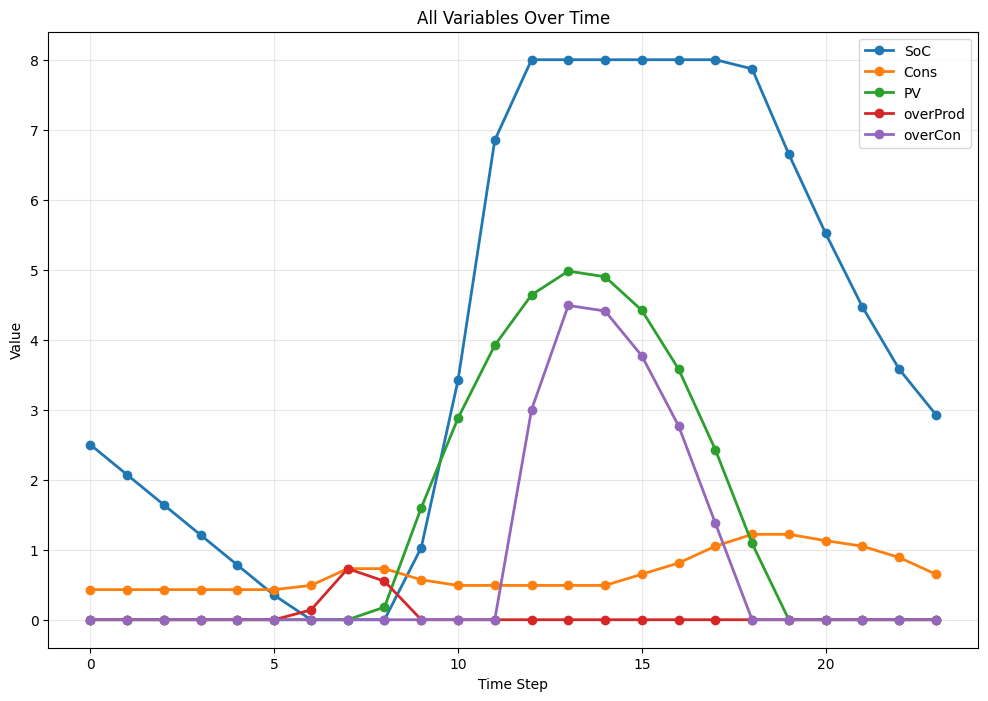

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

combined = pd.concat([soc_df, data], axis=1)

for column in ['SoC', 'Cons', 'PV', 'overProd', 'overCon']:
    plt.plot(combined.index, combined[column], marker='o', label=column, linewidth=2, markersize=6)

plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title('All Variables Over Time')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [7]:
import numpy as np

totalCostWithPvBatt = price - earning
totalCostWithPvBatt

data["diff"] = data["PV"] - data["Cons"]

data["profit"] = np.maximum(data["diff"], 0) * data["kWh price for selling"]
data["cost"] = np.maximum(-data["diff"], 0) * data["kWh price for buying"]

totalCostWithPvNoBatt = data["cost"].sum() - data["profit"].sum()

print(f"With batt: {totalCostWithPvBatt:.2f}")
print(f"No batt: {totalCostWithPvNoBatt:.2f}")
print(f"Difference: {(totalCostWithPvBatt - totalCostWithPvNoBatt):.2f}")

With batt: 50.86
No batt: 1.16
Difference: 49.70
